In [3]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

import matplotlib.pyplot as plt


x = tf.Variable(3, name="x") 
y = tf.Variable(4, name="y") 
f=x*x*y+y+2


sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


In [4]:
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
 theta_value = theta.eval()


11321344/11490434 [============================>.] - ETA: 0s

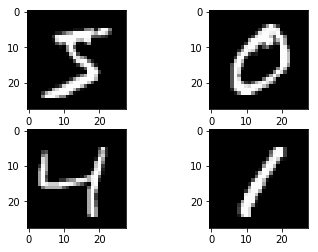

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1411 - val_acc: 0.9576
Epoch 2/10
5s - loss: 0.1115 - acc: 0.9677 - val_loss: 0.0923 - val_acc: 0.9708
Epoch 3/10
6s - loss: 0.0720 - acc: 0.9793 - val_loss: 0.0785 - val_acc: 0.9765
Epoch 4/10
5s - loss: 0.0506 - acc: 0.9857 - val_loss: 0.0742 - val_acc: 0.9769
Epoch 5/10
6s - loss: 0.0374 - acc: 0.9892 - val_loss: 0.0672 - val_acc: 0.9786
Epoch 6/10
6s - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 7/10
6s - loss: 0.0211 - acc: 0.9944 - val_loss: 0.0617 - val_acc: 0.9813
Epoch 8/10
6s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0619 - val_acc: 0.9805
Epoch 9/10
6s - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0585 - val_acc: 0.9818
Epoch 10/10
5s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0591 - val_acc: 0.9814
Baseline Error: 1.86%


In [5]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [13]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2788 - acc: 0.9209 - val_loss: 0.1413 - val_acc: 0.9575
Epoch 2/10
5s - loss: 0.1119 - acc: 0.9677 - val_loss: 0.0920 - val_acc: 0.9711
Epoch 3/10
5s - loss: 0.0720 - acc: 0.9795 - val_loss: 0.0782 - val_acc: 0.9766
Epoch 4/10
6s - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 5/10
5s - loss: 0.0373 - acc: 0.9892 - val_loss: 0.0667 - val_acc: 0.9788
Epoch 6/10
5s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0638 - val_acc: 0.9794
Epoch 7/10
5s - loss: 0.0210 - acc: 0.9946 - val_loss: 0.0626 - val_acc: 0.9805
Epoch 8/10
6s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0637 - val_acc: 0.9802
Epoch 9/10
5s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0591 - val_acc: 0.9812
Epoch 10/10
5s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0603 - val_acc: 0.9810
Baseline Error: 1.90%
